In [25]:
import os, sys
sys.path.append(os.path.join(os.getcwd(), ".."))  # If we run the jupyter notebook from the current directory

# Static (laser) speckle simulation
## Basic introduction
This notebook will show how to simulate various laser speckle patterns. They are static, so they don't change in time; only a single image is produced. Currently, the speckles are created following an imaging geometry: we generate random phases (currently only uniform phases) following a certain image size, then we propagate the speckles through a lens (a pupil with a certain shape, either circular or ellipsoid for now). Then, the speckles are propagated from the lens to the image plane. Non imaging speckles will be implemented in the future.

Laser speckles follow interesting properties related to the pupil they go through, and the size of the scattering spot. In our case, the scattering spots are squares with a certain dimension. Then, when they propagate through the lens, the shape of the lens impacts the shape of the speckles. For example, an ellipsoid pupil will generate ellipsoid speckles. The dimension of the pupil also impacts the dimension of the speckles. The general speckle size equation is:

$$A_s = \frac{\lambda^2 z^2}{A}$$
where $A_s$ is the average area of a unique speckle, $\lambda$ is the light source wavelength, $z$ is the distance between the scattering spot and the imaging plane, and $A$ is the scattering spot area. In our case, this simplifies to:

$$S_s \approx \sqrt{A_s} \approx \frac{\lambda z}{M}$$
where $S_s$ is the approximate average one-dimensional speckle size, $M$ is the scattering spot one-dimensional length. With our imaging geometry (and other geometry in general), this is approximated by:

$$S_s \propto \frac{L}{D}$$
where $L$ is the image size (the one-dimensional length of the array of random phases) and $D$ is the diameter of the pupil. The size is in pixels, but to convert it to units one needs to use the wavelength.

Knowing that, we can easily generate speckles of specific sizes, whether horizontal or vertical.


## Introduction to the code
Let's first import the important files and classes. The first one imported is a general file containing multiple classes to generate static speckle patterns. For now, only imaging speckles can be created, and they are forced to follow a uniform phase distribution, but more choices will be provided in the near future. Our goal is to make it simple, but also useful in various situations. The second file we import is a utility file where static methods are defined. They are related to speckle size, so we can, knowing the image size, create speckles with specific sizes.

In [8]:
from src.SpeckleSimulations import staticSpeckleSimulation
from src.SpeckleSimulations.simulationUtils import SpeckleSimulationsUtils

Let's now create simple circular speckles with a shape of $10$ pixels. The image size will be $1000\times 1000$. The pupil diameter will be computed to give us speckles with approximately $10$ pixels of height and width:

In [9]:
sim_shape = 1000
desired_speckle_size = 10
pupil_diameter = SpeckleSimulationsUtils.circle_diameter_for_specific_speckle_size(sim_shape, desired_speckle_size)
sim = staticSpeckleSimulation.SpeckleSimulationFromCircularSource(sim_shape, pupil_diameter)

Now, the simulation object `sim` is created, but the work is not done. We need to simulate the speckles:

In [15]:
sim.simulate()

Then, we can show the simulation (display with `matplotlib`):

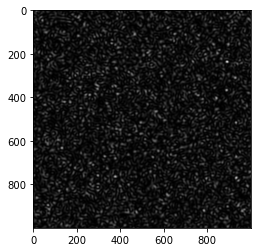

In [16]:
sim.show_previous_simulation()

## Ellipsoid speckles
Creating ellipsoid speckles is (almost) as easy as the circular ones. We will generate ellipsoid speckles with a vertical size of $20$ and an horizontal size of $5$ (always approximate, in pixels):

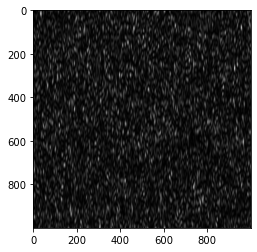

In [18]:
vertical_size, horizontal_size = SpeckleSimulationsUtils.ellipse_diameters_for_specific_speckle_sizes(sim_shape, 20, 5)
sim = staticSpeckleSimulation.SpeckleSimulationFromEllipsoidSource(sim_shape, vertical_size, horizontal_size)
sim.simulate()
sim.show_previous_simulation()

We can see that the speckles are taller than they are wide. This makes sense, since we defined an ellipsoid pupil taller than it is wider.

## "Partially" developed speckle pattern
Partially developed speckles are defined by speckles that don't have an exponential intensity distribution. This can be achieved in many ways: nonuniform phase distribution, partially polarized light or a sum of speckle patterns. The last two ones are implemented currently, the first one is a goal we currently have. Partially polarized speckles are a special case of a sum of speckle patterns and correlated speckles patterns. Let's start by talking about the sum of speckle patterns. We won't go over the details of the sum of speckle patterns, it is well documented in the literature. However, it is important to know that a sum of speckle patterns doesn't have an exponential intensity distribution. In order to create partially developed speckles, we simply sum a certain number of speckle patterns.

To do so, we must use the `PartiallyDevelopedSpeckleSimulation` class. To create the simulation, we must *give* a base static simulation class (like `SpeckleSimulationFromCircularSource` or `SpeckleSimulationFromEllipsoidSource`), and then the right arguments for that class to create different inner simulations based on that class. Then, we once again use `simulate`, but this time the method requires a number of patterns to sum and if we want to do the average of the sum (statistically speaking, the average changes the distribution. Physically speaking, a detector typically only sums. It does not normalize).

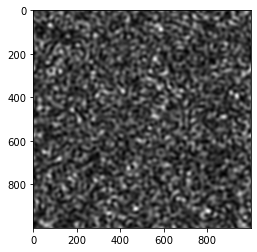

In [19]:
base = staticSpeckleSimulation.SpeckleSimulationFromCircularSource
sim = staticSpeckleSimulation.PartiallyDevelopedSpeckleSimulation(base, 1000, 50)
sim.simulate(5)
sim.show_previous_simulation()

In the previous example, we used `SpeckleSimulationFromCircularSource` as the base class, but literally any class deriving `StaticSpeckleSimulation`, whether it exists or not (except for the `PartiallyDevelopedSpeckleSimulation` class itself) will work.

## Partially polarized speckle patterns
When light is partially polarized, the speckle pattern is different. The statistics change depending on the polarization degree of the light. It is documented by Goodman in *Speckle Phenomena in Optics: Theory and Applications*, so the theory behind it will not be presented here.

We offer a way to generate polarized speckle patterns, following what Duncan and Kirkpatrick described in their article *Algorithms for simulation of speckle (laser and otherwise)*. It is developed in the `SpeckleSimulationFromCircularSourceWithPolarization` class. The class works closely to a normal simulation, except that the simulation algorithm is different.

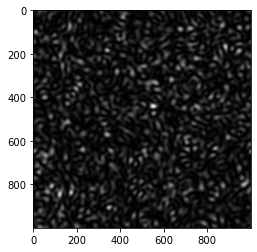

In [20]:
sim = staticSpeckleSimulation.SpeckleSimulationFromCircularSourceWithPolarization(1000, 50, 0.99)
sim.simulate()
sim.show_previous_simulation()

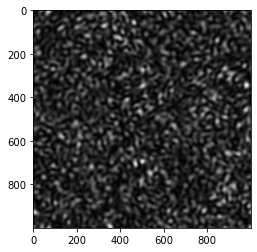

In [22]:
sim = staticSpeckleSimulation.SpeckleSimulationFromCircularSourceWithPolarization(1000, 50, 0.01)
sim.simulate()
sim.show_previous_simulation()

## Saving simulations
Single simulations can be saved under a certain name and certain file format. The file format must be recognized by the `imageio` module. By default, if no extension is provided, a *TIFF* is created. It is worth noting that if the format is not known by `imageio`, one can modify the code to extend the supported file formats.

In [24]:
sim.save_previous_simulation("test_simulation_static_save.tiff")
sim.save_previous_simulation("test_simulation_static_save.png")  # This gives a warning due to conversion

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


Saving under certain formats, like *PNG*, will give a warning, because the simulation is initially defined in the range $[0,1]$, but when saving under those formats will convert it in the range $[0, 255]$, hence performing a lossy conversion from floats to integers. When performing simulations to do rigorous analysis, we recommend saving in the *TIFF* format for its qualities and advantages regarding compression and possible values.

## Conclusion
This concludes our introduction and examples to static speckle simulations. We have seen how easy and polyvalent our code is. It is our goal to make it as simple as possible, but it is also our goal to make it as useful as possible.

The next example notebook will review our code for dynamic speckle simulations, i.e. moving speckle patterns. The code is not much complex, we wanted to stay with the same API.